# This program will be used to read through individual excel files and extract the data for plotting
# For MRC step stimulation data

In [116]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import csv
import glob
import seaborn as sns
import numpy as np


In [117]:
# enter pathway of where files are saved 
# C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\ExtractedData
fpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ALM_ephys/ExtractedData/'
all_files = glob.glob(fpath + "/*.csv")

In [118]:
pwd

'C:\\Users\\LingxinW\\Google Drive\\PythonScripts\\EphysAnalysis'

In [119]:
# put all individual csv dataframe files into one dataframe file df
analysis = pd.DataFrame()
for x in all_files:
    df = pd.read_csv(x)
    #f['t_half_act_on'][0]= ''
    analysis=pd.concat([analysis,df])
analysis.head(10)

,worm_strain,cell_ID,stim_um,amp_peaks_on,t_peaks_on,amp_peaks_off,t_peaks_off,t_start_act_on,t_start_act_off,t_half_act_on,t_half_act_off,t_half_decay_on,t_half_decay_off,group_number
0,TU2769,ALMLW001,1,-9.592923,0.1602,-8.539088,0.4552,0.1506,0.4492,4.8,3.0,16.8,19.6,2
1,TU2769,ALMLW001,3,-38.047764,0.1532,-35.030586,0.4544,0.1506,0.4492,1.3,2.6,11.2,13.0,2
2,TU2769,ALMLW001,5,-58.534940,0.1532,-56.523555,0.4526,0.1506,0.4492,1.3,1.7,9.4,12.4,2
3,TU2769,ALMLW001,7,-79.812770,0.1528,-68.087917,0.4532,0.1506,0.4492,1.1,2.0,10.0,9.6,2
4,TU2769,ALMLW001,9,-86.572711,0.1526,-71.721998,0.4528,0.1506,0.4492,1.0,1.8,11.6,9.6,2
5,TU2769,ALMLW001,11,-99.007835,0.1526,-81.577483,0.4526,0.1506,0.4492,1.0,1.7,14.6,11.0,2
0,TU2769,ALMLW002,1,-17.865828,0.1568,-16.870395,0.4548,0.1506,0.4492,3.1,2.8,23.6,20.0,4
1,TU2769,ALMLW002,3,-35.845158,0.1536,-31.801306,0.4530,0.1506,0.4492,1.5,1.9,15.0,14.4,4
2,TU2769,ALMLW002,5,-43.467036,0.1532,-39.088794,0.4530,0.1506,0.4492,1.3,1.9,13.8,12.4,4
3,TU2769,ALMLW002,7,-45.022924,0.1528,-43.462380,0.4526,0.1506,0.4492,1.1,1.7,15.0,13.8,4


In [120]:
analysis['worm_strain'] # here is just to confirm all files are concatinated 

0    TU2769
1    TU2769
2    TU2769
3    TU2769
4    TU2769
      ...  
1    TU2769
2    TU2769
3    TU2769
4    TU2769
5    TU2769
Name: worm_strain, Length: 72, dtype: object

In [123]:
# change negative current value to positive for plotting purpose and display purpose

analysis['amp_peaks_on']=-analysis['amp_peaks_on']

analysis['amp_peaks_on']

0     9.592923
1    38.047764
2    58.534940
3    79.812770
4    86.572711
       ...    
1    27.451513
2    37.998921
3    53.779083
4    62.528032
5    73.124854
Name: amp_peaks_on, Length: 72, dtype: float64

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Commanded displacement (um)')

<Figure size 432x288 with 0 Axes>

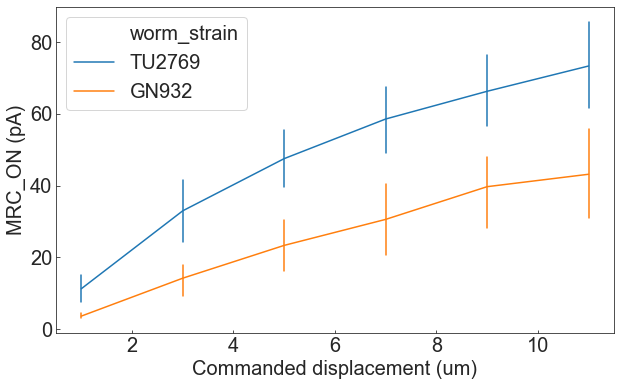

In [124]:
# plot the figures using seaborn 
# plot MRC_ON amplitude

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True, top = False, right = False)
plt.rcParams.update({'font.size': 20})
plt.rcParams['svg.fonttype'] = 'none'

#%% plotting specific data from dataframe
#order = ['TU2769', 'GN932']
#xticklabels = ['WT', 'mutant']


plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
fig = sns.lineplot(x='stim_um', y='amp_peaks_on', data=analysis, hue = 'worm_strain',ci = 95, err_style ='bars')
plt.ylabel('MRC_ON (pA)')
plt.xlabel('Commanded displacement (um)')

#fig2 = sns.stripplot(x='stim_um', y='t_half_act_on', data=analysis, alpha=0.5,order=order)

#plt.xticks(np.arange(len(order)), xticklabels, rotation=90)  # Set text labels and properties.


In [127]:
# change negative current value to positive for plotting purpose and display purpose
analysis['amp_peaks_off']=-analysis['amp_peaks_off']

analysis['amp_peaks_off']


0     8.539088
1    35.030586
2    56.523555
3    68.087917
4    71.721998
       ...    
1    21.419750
2    37.875983
3    39.581910
4    45.539530
5    50.024459
Name: amp_peaks_off, Length: 72, dtype: float64

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'commended displacement (um)')

<Figure size 432x288 with 0 Axes>

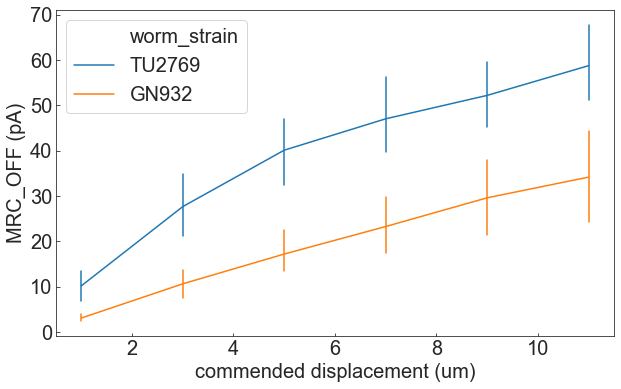

In [128]:
# plot the figures using seaborn 
# plot MRC_OFF amplitude

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 20})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
fig = sns.lineplot(x='stim_um', y='amp_peaks_off', data=analysis, hue = 'worm_strain', err_style ='bars')
plt.ylabel('MRC_OFF (pA)')
plt.xlabel('commended displacement (um)')

In [129]:
#analysis2=analysis[(analysis['stim_um']>1)]
#analysis2

In [38]:
#analysis['t_half_act_on']=NaN
#analysis['t_half_act_on']

No handles with labels found to put in legend.


Text(0, 0.5, 'Activation t1/2 (ms)')

<Figure size 432x288 with 0 Axes>

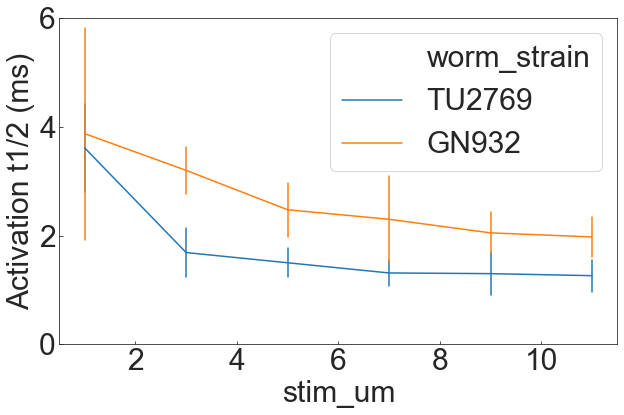

In [135]:
# plot the figures using seaborn 
# plot MRC_ON Activation t1/2



sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
plt.ylim(0,6)
fig = sns.lineplot(x='stim_um', y='t_half_act_on', data=analysis, hue = 'worm_strain', err_style ='bars', ci = 'sd')
plt.ylabel('Activation t1/2 (ms)')

No handles with labels found to put in legend.


Text(0, 0.5, 'Decay t1/2 (ms)')

<Figure size 432x288 with 0 Axes>

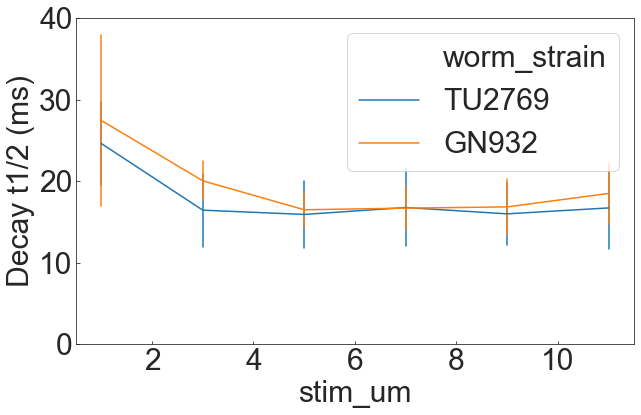

In [136]:
# plot the figures using seaborn 
# plot MRC_ON Decay t1/2

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
plt.ylim(0,40)
fig = sns.lineplot(x='stim_um', y='t_half_decay_on', data=analysis, hue = 'worm_strain', err_style ='bars', ci='sd')
plt.ylabel('Decay t1/2 (ms)')

No handles with labels found to put in legend.


Text(0, 0.5, 'Activation t1/2 (ms)')

<Figure size 432x288 with 0 Axes>

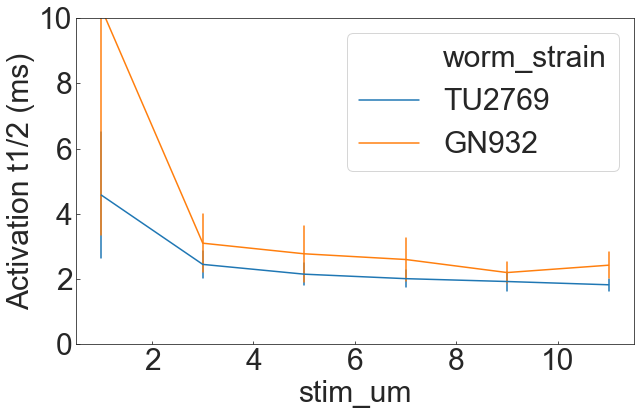

In [140]:
# plot the figures using seaborn 
# plot MRC_OFF Activation t1/2

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
plt.ylim(0,10)
fig = sns.lineplot(x='stim_um', y='t_half_act_off', data=analysis, hue = 'worm_strain', err_style ='bars', ci='sd')
plt.ylabel('Activation t1/2 (ms)')

No handles with labels found to put in legend.


Text(0, 0.5, 'Decay t1/2 (ms)')

<Figure size 432x288 with 0 Axes>

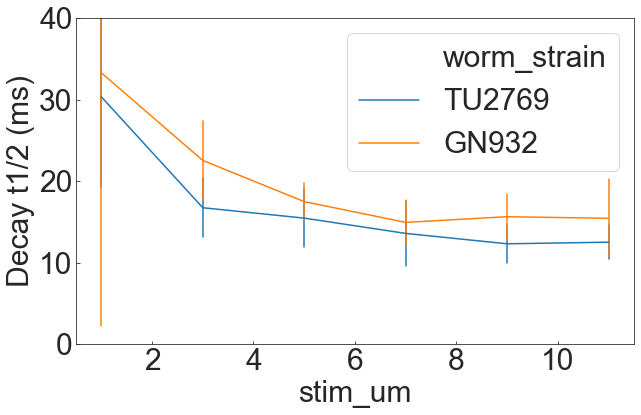

In [144]:
# plot the figures using seaborn 
# plot MRC_OFF Decay t1/2

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
plt.ylim(0,40)
fig = sns.lineplot(x='stim_um', y='t_half_decay_off', data=analysis, hue = 'worm_strain', err_style ='bars', ci='sd')
plt.ylabel('Decay t1/2 (ms)')